# Customer Churn Prediction

In [1]:
# Importing the essential Libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Reading the Dataset
df = pd.read_csv('customer_churn_large_dataset.csv')

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [8]:
# Printing Unique Values of the categorical variables
print(df['Name'].unique())
print(df['Gender'].unique())
print(df['Location'].unique())


['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
['Male' 'Female']
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [9]:
# Checking if there are null values or not
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [11]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [12]:
# Including only Potential Predictors as independent varibles
final_dataset = df[['Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]

In [13]:
final_dataset.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,Customer_1,63,Male,Los Angeles,17,73.36,236
1,Customer_2,62,Female,New York,1,48.76,172
2,Customer_3,24,Female,Los Angeles,5,85.47,460
3,Customer_4,36,Female,Miami,3,97.94,297
4,Customer_5,46,Female,Miami,19,58.14,266


In [14]:
import pandas as pd
# List of categorical columns
categorical_columns = ['Age',	'Subscription_Length_Months','Monthly_Bill',	'Total_Usage_GB' ]

# Convert categorical variables into dummy variables
final_dataset = pd.get_dummies(df[categorical_columns], drop_first=True)

# Drop original categorical columns from the main DataFrame
df = df.drop(columns=categorical_columns)

# Concatenate the dummy variables DataFrame with the main DataFrame
df = pd.concat([df, final_dataset], axis=1)

In [15]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap#
#final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [16]:
final_dataset.sample(5)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
74221,23,10,48.26,125
63187,26,8,50.67,311
86601,30,13,60.83,424
40425,23,23,95.90,188
78894,45,3,93.11,96


In [17]:
import seaborn as sns

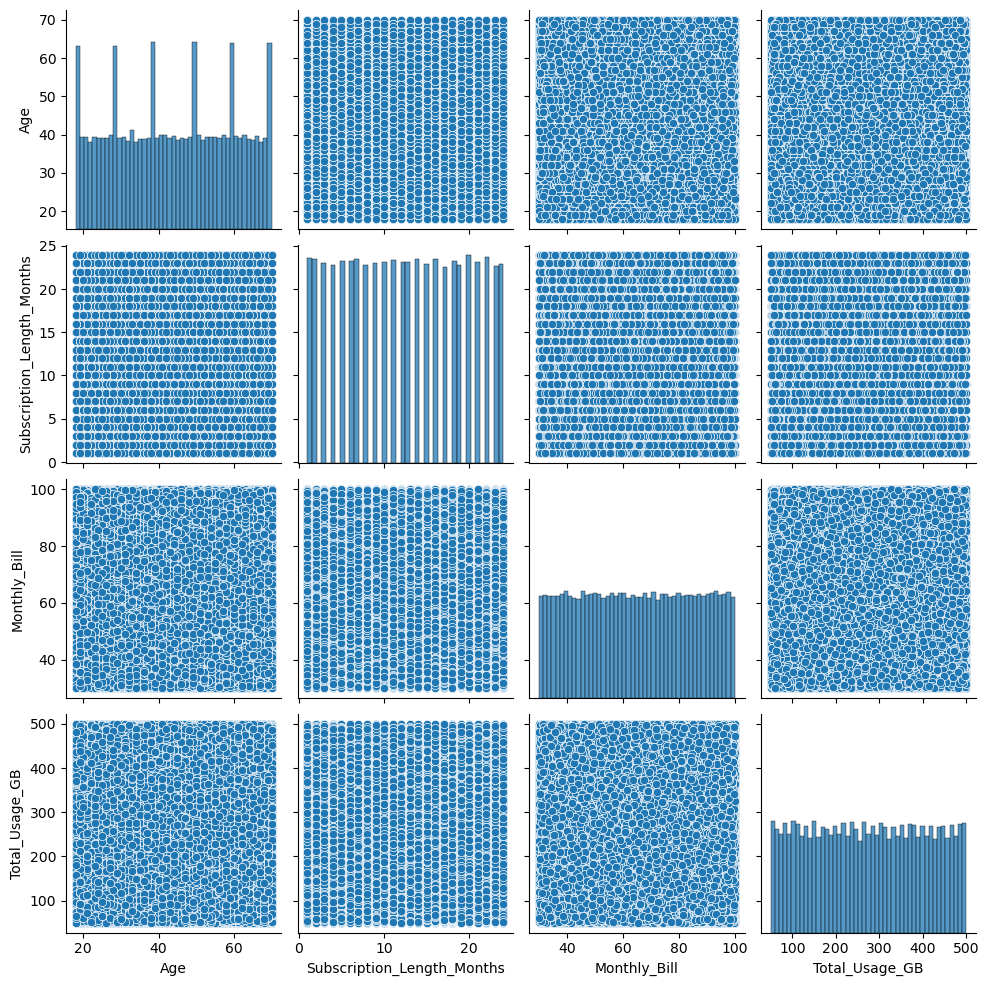

In [18]:
sns.pairplot(final_dataset)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_8456\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

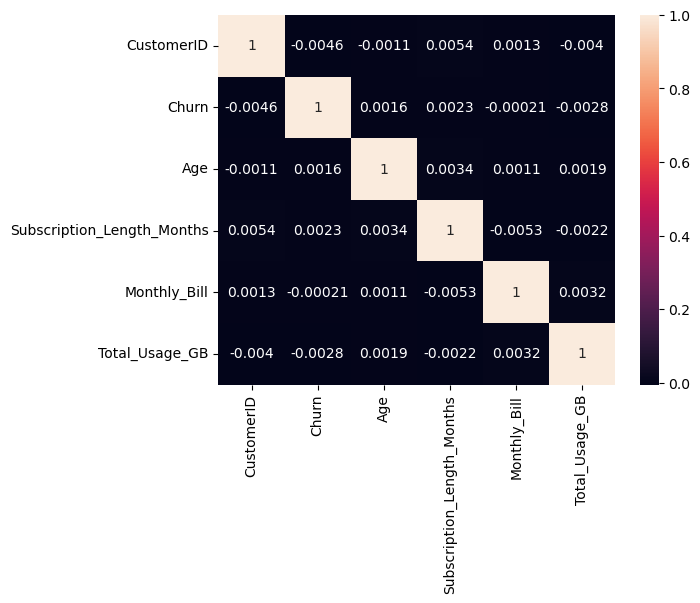

In [20]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

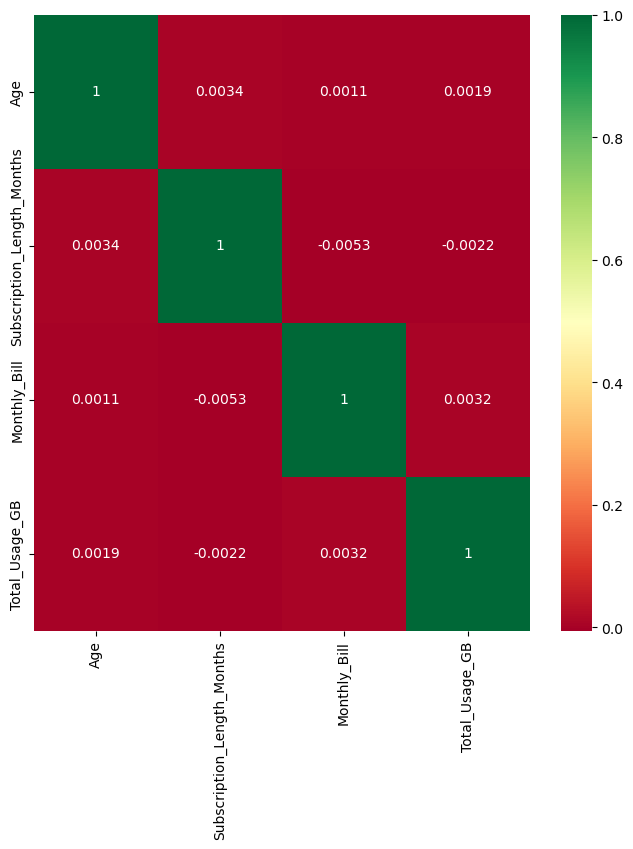

In [21]:
# Plotting The Correlations between all the features
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8, 8))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

From the heatmap , we find that teh Age, Balance and the Geography of the Customer are Most important features

In [22]:
final_dataset.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,17,73.36,236
1,62,1,48.76,172
2,24,5,85.47,460
3,36,3,97.94,297
4,46,19,58.14,266


In [23]:
# # Splitting the Dataset into Dependent and Independent Variables
# X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
# y = final_dataset.iloc[:, 8].values

In [24]:
# Define the target variable (dependent variable)
target_column = 'Churn'
y = df[target_column]

# Define the predictor variables (independent variables)
predictor_columns = ['Age',	'Subscription_Length_Months','Monthly_Bill',	'Total_Usage_GB']
X = df[predictor_columns]

In [25]:
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,17,73.36,236
1,62,1,48.76,172
2,24,5,85.47,460
3,36,3,97.94,297
4,46,19,58.14,266


In [26]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [27]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [28]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(X_train)

[[ 0.65344669 -1.08272837  0.96025455 -0.53377381]
 [-1.04827574  1.66388226  0.83962354 -0.27325726]
 [ 0.84979927 -0.07081919 -0.63217363 -1.62947581]
 ...
 [ 1.63520963 -1.51640373  0.55188892  0.35504739]
 [ 0.71889755 -0.07081919  1.19212316  0.30907388]
 [-1.17917747  0.65197308  0.26365992  0.46231891]]


In [30]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[0.20051057 0.15343569 0.33465616 0.31139758]


In [32]:
acc = []
model = []
precisionList = []
recallList = []
f1List = []

# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

precision = metrics.precision_score(y_test, predicted_values, average='macro')
recall = metrics.recall_score(y_test, predicted_values, average='macro')
f1 = metrics.f1_score(y_test, predicted_values, average='macro')



acc.append(x)
precisionList.append(precision)
recallList.append(recall)
f1List.append(f1)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.5013
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     10079
           1       0.50      0.43      0.46      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# **Logistic Regression**

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

precision = metrics.precision_score(y_test, predicted_values, average='macro')
recall = metrics.recall_score(y_test, predicted_values, average='macro')
f1 = metrics.f1_score(y_test, predicted_values, average='macro')



acc.append(x)
precisionList.append(precision)
recallList.append(recall)
f1List.append(f1)
model.append('LR')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.4998
              precision    recall  f1-score   support

           0       0.50      0.70      0.59     10079
           1       0.49      0.29      0.37      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000



# **XGBoost**

In [36]:
# XGBoost
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

precision = metrics.precision_score(y_test, predicted_values, average='macro')
recall = metrics.recall_score(y_test, predicted_values, average='macro')
f1 = metrics.f1_score(y_test, predicted_values, average='macro')



acc.append(x)
precisionList.append(precision)
recallList.append(recall)
f1List.append(f1)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost's Accuracy is:  0.5035
              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# **K Neighbors Classifier**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
KNN.fit(X_train,y_train)

# Predicting the Test set results
predicted_values = KNN.predict(X_test)

# Accuracy
x = metrics.accuracy_score(y_test, predicted_values)

precision = metrics.precision_score(y_test, predicted_values, average='macro')
recall = metrics.recall_score(y_test, predicted_values, average='macro')
f1 = metrics.f1_score(y_test, predicted_values, average='macro')



acc.append(x)
precisionList.append(precision)
recallList.append(recall)
f1List.append(f1)
model.append('kNN')
print("K-Nearest Neighbours's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

K-Nearest Neighbours's Accuracy is:  0.4981
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# **Neural Network**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Load your dataset into a DataFrame named 'df'
df = pd.read_csv("customer_churn_large_dataset.csv")

# Define the target variable (dependent variable)
target_column = 'Churn'
y = df[target_column]

# Define the predictor variables (independent variables)
predictor_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
X = df[predictor_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the MLPClassifier (Neural Network) model
nn = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# Train the model on the training data
nn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1-score: 0.42
              precision    recall  f1-score   support

           0       0.50      0.86      0.63     10079
           1       0.49      0.14      0.21      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.42     20000
weighted avg       0.50      0.50      0.43     20000



In [39]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)